<a href="https://colab.research.google.com/github/rachealolarewaju-cyber/weather-and-climate-analysis-/blob/main/Question_4_weather_and_climate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
! pip install pandas

In [55]:
import pandas as pd


In [56]:
df = pd.read_csv("/content/combined_output_3.csv")

In [57]:
df.head(10)

,YEAR,MONTH,DAY,MERRA-2 Temperature at 2 Meters (C),MERRA-2 Temperature at 2 Meters Range (C),MERRA-2 Temperature at 2 Meters Maximum (C),MERRA-2 Temperature at 2 Meters Minimum (C),MERRA-2 Precipitation Corrected (mm/day),MERRA-2 Relative Humidity at 2 Meters (%),MERRA-2 Specific Humidity at 2 Meters (g/kg),MERRA-2 Wind Speed at 10 Meters (m/s),Latitude,Longitude
0,1990,1,1,27.65,17.71,37.23,19.51,0.0,19.00,4.03,2.42,9.406,13.462
1,1990,1,2,27.87,17.19,37.21,20.01,0.0,19.12,3.91,1.84,9.406,13.462
2,1990,1,3,27.79,17.03,37.00,19.96,0.0,15.50,3.23,2.38,9.406,13.462
3,1990,1,4,26.89,18.41,36.40,17.99,0.0,19.50,4.03,2.56,9.406,13.462
4,1990,1,5,27.76,18.21,37.14,18.94,0.0,20.50,4.39,2.50,9.406,13.462
5,1990,1,6,27.62,15.62,35.90,20.28,0.0,21.19,4.82,4.22,9.406,13.462
6,1990,1,7,27.54,15.73,35.90,20.16,0.0,18.81,4.27,5.57,9.406,13.462
7,1990,1,8,27.88,16.22,36.61,20.39,0.0,17.94,4.09,5.43,9.406,13.462
8,1990,1,9,28.14,16.01,37.20,21.19,0.0,19.44,4.76,5.79,9.406,13.462
9,1990,1,10,27.76,17.90,37.49,19.58,0.0,15.62,3.54,6.80,9.406,13.462


In [58]:
df = pd.read_csv("/content/combined_output_3.csv")

In [59]:
df["date"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])

In [60]:
df = df.rename(columns={
    "MERRA-2 Temperature at 2 Meters (C)": "temp_c",
    "MERRA-2 Precipitation Corrected (mm/day)": "precip_mm"
})

In [61]:
def plot_trend(x, y, label, ylabel):
    slope, intercept, r, p, se = linregress(x, y)
    print(f"{label} trend: slope={slope:.3f}, p={p:.3f}, R²={r**2:.2f}")

    plt.figure(figsize=(8,5))
    plt.scatter(x, y, color="blue", label="Observed")
    plt.plot(x, intercept + slope*x, color="red",
             label=f"Trend line (slope={slope:.3f})")
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.title(f"Trend in {label} (1990–2023)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [62]:
df = pd.read_csv('/content/combined_output_3.csv')


In [63]:
df['date'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])
df = df.sort_values('date').reset_index(drop=True)


In [64]:
def theil_sen_slope(y):
    """Median of all pairwise slopes → robust to outliers"""
    n = len(y)
    slopes = []
    for i in range(n):
        for j in range(i+1, n):
            slopes.append((y[j] - y[i]) / (j - i))
    return np.median(slopes)

def mann_kendall(y):
    """Return Kendall S, variance, two-sided p-value"""
    n = len(y)
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(y[j] - y[k])
    var_s = n*(n-1)*(2*n+5)/18
    if s > 0:      z = (s - 1)/np.sqrt(var_s)
    elif s < 0:    z = (s + 1)/np.sqrt(var_s)
    else:          z = 0
    p = 2*(1 - norm.cdf(abs(z)))
    return s, var_s, p

In [65]:
def trend_pandas(series, alpha=0.05):
    """
    series : pandas Series with DatetimeIndex
    returns: dict with slope (per year), intercept, mk_p, trend_flag
    """
    y = series.dropna().values
    x = np.arange(len(y))                      # 0,1,2,…
    slope_per_step = theil_sen_slope(y)
    intercept      = np.median(y - slope_per_step*x)

    # convert slope → “per year”
    dt_years = (series.index[-1] - series.index[0]).days / 365.25
    slope_per_year = slope_per_step * (len(y)-1) / dt_years

    _, _, mk_p = mann_kendall(y)
    trend_flag = 0
    if mk_p < alpha:
        trend_flag = 1 if slope_per_year > 0 else -1

    return {'slope_per_year': slope_per_year,
            'intercept'     : intercept,
            'mk_p'          : mk_p,
            'trend_flag'    : trend_flag}   # +1 up, -1 down, 0 none

In [67]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/combined_output_3.csv')


In [16]:
!pip install -q pymannkendall   # for MK p-value

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm   # for MK test

In [20]:
df['date'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])
df = df.set_index('date')

# Select a column to create the time series (e.g., precipitation)
col = 'MERRA-2 Precipitation Corrected (mm/day)'
ts = df[col]

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [22]:
df = pd.read_csv("combined_output_3.csv")

In [23]:
df["date"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])

In [28]:
df = df.rename(columns={
    "MERRA-2 Temperature at 2 Meters (C)": "temp_c",
    "MERRA-2 Precipitation Corrected (mm/day)": "precip_mm"
})

In [37]:
import pandas as pd
import matplotlib.pyplot as plt



In [38]:
 df = pd.read_csv("/content/combined_output_3.csv")

In [40]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

In [41]:
df.set_index('Date', inplace=True)

In [43]:
df.columns = df.columns.str.strip()
temperature_column = 'MERRA-2 Temperature at 2 Meters (C)'

In [45]:
if temperature_column not in df.columns:
            print(f"Error: Column '{temperature_column}' not found in the DataFrame.")
            print("Please check the column names in your CSV file.")

In [46]:
rolling_mean_temp = df[temperature_column].rolling(window=365).mean()

In [47]:
monthly_mean_temp = df[temperature_column].resample('M').mean()

/tmp/ipython-input-2150557448.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_temp = df[temperature_column].resample('M').mean()


In [49]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("/content/combined_output_3.csv")
df.columns = df.columns.str.strip()

In [55]:
columns_to_analyze = [
            'MERRA-2 Temperature at 2 Meters (C)',
            'MERRA-2 Temperature at 2 Meters Range (C)',
            'MERRA-2 Temperature at 2 Meters Maximum (C)',
            'MERRA-2 Temperature at 2 Meters Minimum (C)',
            'MERRA-2 Precipitation Corrected (mm/day)',
            'MERRA-2 Relative Humidity at 2 Meters (%)',
            'MERRA-2 Specific Humidity at 2 Meters (g/kg)',
            'MERRA-2 Wind Speed at 10 Meters (m/s)'
        ]

In [58]:
 correlation_matrix = df[columns_to_analyze].corr()


In [60]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [ ]:
 sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                    linewidths=.5, linecolor='black')

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
df = pd.read_csv("/content/combined_output_3.csv")
df.columns = df.columns.str.strip()

In [65]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.set_index('Date', inplace=True)
df.columns = df.columns.str.strip()

In [67]:
  df.ffill(inplace=True)

In [68]:
numerical_cols = [
            'MERRA-2 Temperature at 2 Meters (C)',
            'MERRA-2 Precipitation Corrected (mm/day)',
            'MERRA-2 Relative Humidity at 2 Meters (%)',
            'MERRA-2 Wind Speed at 10 Meters (m/s)'
        ]

In [70]:
temperature_series = df['MERRA-2 Temperature at 2 Meters (C)']
decomposition = seasonal_decompose(temperature_series, model='additive', period=365)

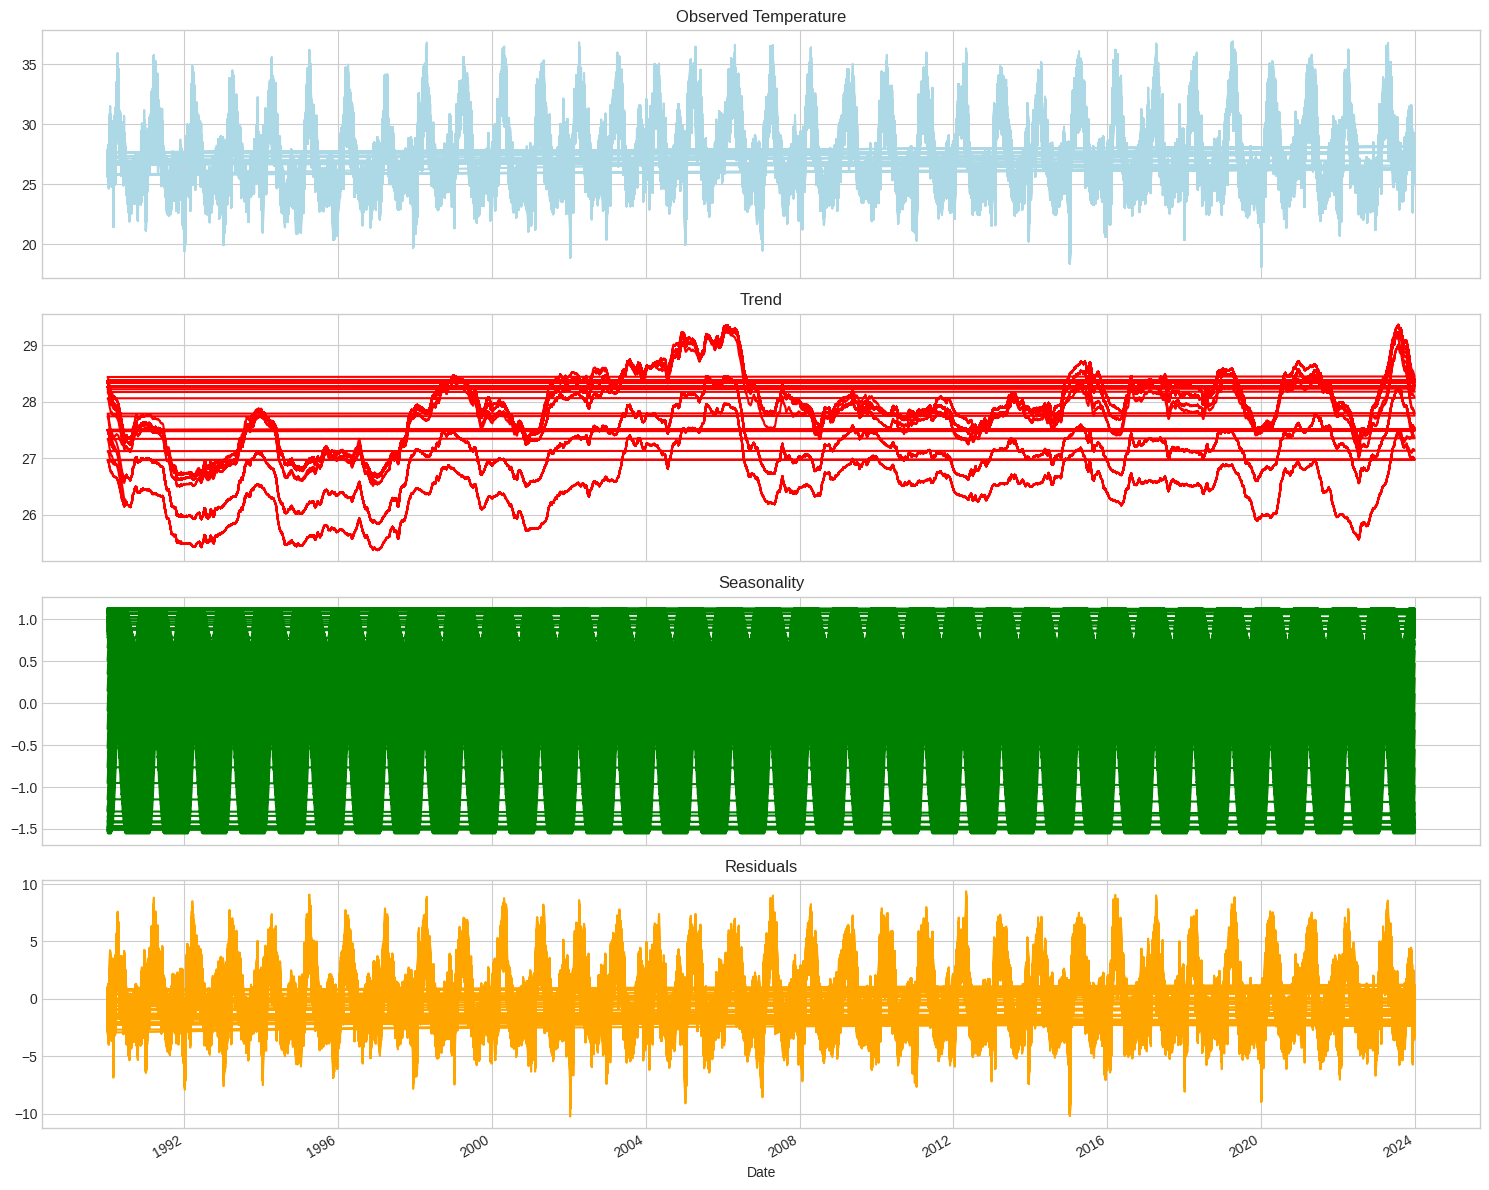

In [73]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
decomposition.observed.plot(ax=ax1, color='lightblue')
ax1.set_title('Observed Temperature')
decomposition.trend.plot(ax=ax2, color='red')
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3, color='green')
ax3.set_title('Seasonality')
decomposition.resid.plot(ax=ax4, color='orange')
ax4.set_title('Residuals')
plt.tight_layout()
plt.show()

In [74]:
print("\n--- Step 3: Correlation Analysis ---")


--- Step 3: Correlation Analysis ---


In [76]:
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

                                           MERRA-2 Temperature at 2 Meters (C)  \
MERRA-2 Temperature at 2 Meters (C)                                   1.000000   
MERRA-2 Precipitation Corrected (mm/day)                             -0.297092   
MERRA-2 Relative Humidity at 2 Meters (%)                            -0.467636   
MERRA-2 Wind Speed at 10 Meters (m/s)                                 0.195772   

                                           MERRA-2 Precipitation Corrected (mm/day)  \
MERRA-2 Temperature at 2 Meters (C)                                       -0.297092   
MERRA-2 Precipitation Corrected (mm/day)                                   1.000000   
MERRA-2 Relative Humidity at 2 Meters (%)                                  0.510111   
MERRA-2 Wind Speed at 10 Meters (m/s)                                     -0.267240   

                                           MERRA-2 Relative Humidity at 2 Meters (%)  \
MERRA-2 Temperature at 2 Meters (C)                              

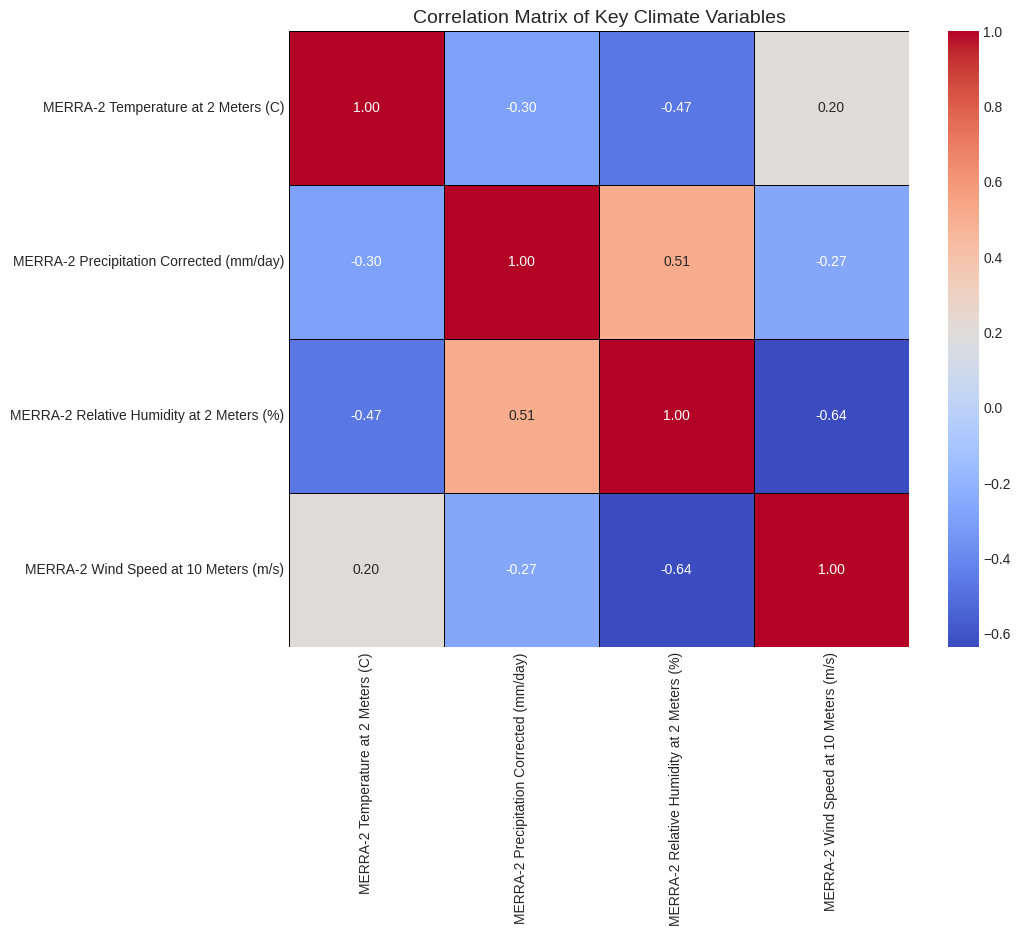

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Matrix of Key Climate Variables', fontsize=14)
plt.show()

In [79]:
print("\n--- Step 4: Feature Engineering for Machine Learning ---")


--- Step 4: Feature Engineering for Machine Learning ---


In [80]:
df['Prev_Day_Temp'] = df['MERRA-2 Temperature at 2 Meters (C)'].shift(1)


In [82]:
ml_df = df[['MERRA-2 Temperature at 2 Meters (C)', 'Prev_Day_Temp']].dropna()
print("\nDataFrame ready for Machine Learning (with lagged feature):")
print(ml_df.head())


DataFrame ready for Machine Learning (with lagged feature):
            MERRA-2 Temperature at 2 Meters (C)  Prev_Day_Temp
Date                                                          
1990-01-02                                27.87          27.65
1990-01-03                                27.79          27.87
1990-01-04                                26.89          27.79
1990-01-05                                27.76          26.89
1990-01-06                                27.62          27.76


In [83]:
print("\nData preparation and analysis complete. The 'ml_df' DataFrame is ready for model training.")


Data preparation and analysis complete. The 'ml_df' DataFrame is ready for model training.


In [88]:
def prepare_and_analyze_data(file_path):
    """
    Loads data, performs initial preparation and analysis.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: The prepared DataFrame for further analysis.
    """
    try:
        df = pd.read_csv(file_path)

        # Strip whitespace from column names
        df.columns = df.columns.str.strip()

        # Create a date column and set it as index
        df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
        df.set_index('Date', inplace=True)

        # Rename columns
        df = df.rename(columns={
            "MERRA-2 Temperature at 2 Meters (C)": "temp_c",
            "MERRA-2 Precipitation Corrected (mm/day)": "precip_mm"
        })

        # Forward fill missing values (as done in a previous cell)
        df.ffill(inplace=True)

        # Create lagged temperature feature
        df['Prev_Day_Temp'] = df['temp_c'].shift(1)

        print("Data preparation and initial analysis complete.")
        print("\nDataFrame head after preparation:")
        display(df.head())

        return df

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except KeyError as e:
        print(f"Error: Missing required columns in the CSV file. {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [90]:
df = pd.read_csv("/content/combined_output_3.csv")
df.columns = df.columns.str.strip()

In [92]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.set_index('Date', inplace=True)
df.columns = df.columns.str.strip()

In [93]:
df.ffill(inplace=True)


In [95]:
df['target_rainfall'] = df['MERRA-2 Precipitation Corrected (mm/day)']
for i in range(1, 8):
    df[f'rainfall_lag_{i}'] = df['target_rainfall'].shift(i)

In [97]:
df['temp_2m'] = df['MERRA-2 Temperature at 2 Meters (C)']
df['rel_humidity'] = df['MERRA-2 Relative Humidity at 2 Meters (%)']
df['wind_speed'] = df['MERRA-2 Wind Speed at 10 Meters (m/s)']

In [98]:
 df.dropna(inplace=True)

In [100]:
print(f"DataFrame after feature engineering. Shape: {df.shape}")
print("Features used for prediction:")
print(df.columns)

DataFrame after feature engineering. Shape: (409754, 24)
Features used for prediction:
Index(['YEAR', 'MONTH', 'DAY', 'MERRA-2 Temperature at 2 Meters (C)',
       'MERRA-2 Temperature at 2 Meters Range (C)',
       'MERRA-2 Temperature at 2 Meters Maximum (C)',
       'MERRA-2 Temperature at 2 Meters Minimum (C)',
       'MERRA-2 Precipitation Corrected (mm/day)',
       'MERRA-2 Relative Humidity at 2 Meters (%)',
       'MERRA-2 Specific Humidity at 2 Meters (g/kg)',
       'MERRA-2 Wind Speed at 10 Meters (m/s)', 'Latitude', 'Longitude',
       'target_rainfall', 'rainfall_lag_1', 'rainfall_lag_2', 'rainfall_lag_3',
       'rainfall_lag_4', 'rainfall_lag_5', 'rainfall_lag_6', 'rainfall_lag_7',
       'temp_2m', 'rel_humidity', 'wind_speed'],
      dtype='object')


In [101]:
 print("\n--- Step 2: Training the Machine Learning Model ---")


--- Step 2: Training the Machine Learning Model ---


In [103]:
features = [col for col in df.columns if 'rainfall_lag_' in col]
features.extend(['temp_2m', 'rel_humidity', 'wind_speed'])

X = df[features]
y = df['target_rainfall']

In [105]:
split_date = pd.to_datetime('2023-01-01')
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

In [112]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (397742, 10)
Testing data shape: (12012, 10)


In [110]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


In [114]:
print("\n--- Step 3: Evaluating the Model ---")
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


--- Step 3: Evaluating the Model ---
Mean Absolute Error (MAE): 1.96
R-squared (R2) Score: 0.23


In [115]:
 print("\n--- Step 4: Predicting Rainfall for 2025 ---")


--- Step 4: Predicting Rainfall for 2025 ---


In [116]:
 last_known_data = df.iloc[-1]

In [121]:
# Create a date range for 2025
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')

# Create a new DataFrame for future data with the same columns as the training features
future_data = pd.DataFrame(index=future_dates, columns=X_train.columns)

# Get data from the last year (2023) to use as a template for future predictions
last_year_data = df[df.index.year == 2023]

# Populate future_data with data from the last year, repeating if necessary
# Ensure the length matches the number of days in 2025 (365)
future_data['temp_2m'] = last_year_data['temp_2m'].values[:len(future_data)]
future_data['rel_humidity'] = last_year_data['rel_humidity'].values[:len(future_data)]
future_data['wind_speed'] = last_year_data['wind_speed'].values[:len(future_data)]

# For lagged rainfall features, we'll need to carry over the last known rainfall values
# This is a simplified approach; a more robust method would involve iterative prediction
last_rainfall_lags = df[['rainfall_lag_1', 'rainfall_lag_2', 'rainfall_lag_3', 'rainfall_lag_4', 'rainfall_lag_5', 'rainfall_lag_6', 'rainfall_lag_7']].iloc[-1].values

# Assign the last known lagged rainfall values to the first row of future_data
if not future_data.empty:
    future_data.iloc[0, future_data.columns.str.startswith('rainfall_lag_')] = last_rainfall_lags

# For subsequent days in future_data, the lagged rainfall values will need to be updated based on predictions
# This requires an iterative prediction approach, which is more complex.
# For a non-iterative prediction, you might use other features or a different modeling approach.
# For now, we'll leave the subsequent lagged rainfall values as NaN or fill them differently if needed.

print("Future data prepared for 2025 prediction:")
print(future_data.head())
print(future_data.tail())

Future data prepared for 2025 prediction:
           rainfall_lag_1 rainfall_lag_2 rainfall_lag_3 rainfall_lag_4  \
2025-01-01            0.0            0.0            0.0            0.0   
2025-01-02            NaN            NaN            NaN            NaN   
2025-01-03            NaN            NaN            NaN            NaN   
2025-01-04            NaN            NaN            NaN            NaN   
2025-01-05            NaN            NaN            NaN            NaN   

           rainfall_lag_5 rainfall_lag_6 rainfall_lag_7  temp_2m  \
2025-01-01            0.0            0.0            0.0    25.70   
2025-01-02            NaN            NaN            NaN    25.82   
2025-01-03            NaN            NaN            NaN    26.28   
2025-01-04            NaN            NaN            NaN    26.78   
2025-01-05            NaN            NaN            NaN    26.86   

            rel_humidity  wind_speed  
2025-01-01         22.12        4.91  
2025-01-02         27.31  

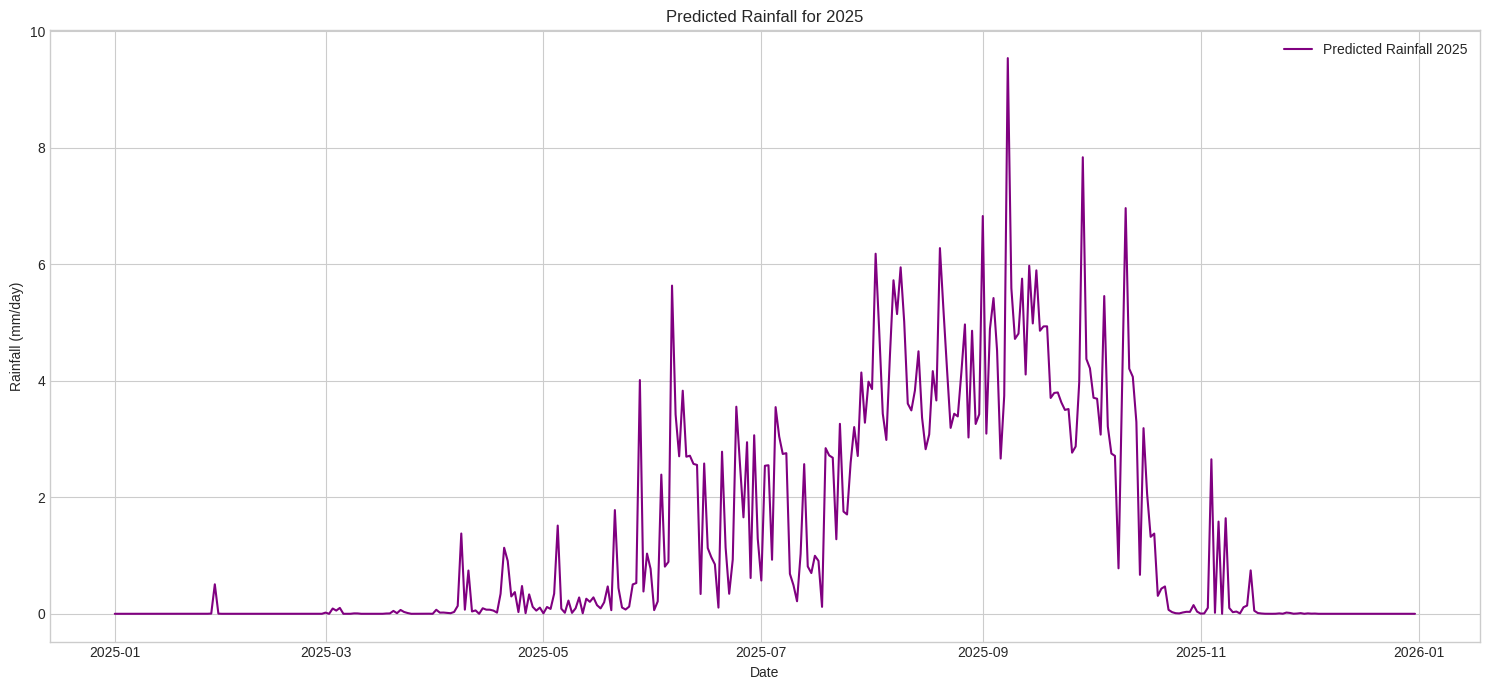

In [125]:
plt.figure(figsize=(15, 7))
plt.plot(future_data.index, future_data['predicted_rainfall'], label='Predicted Rainfall 2025', color='purple')
plt.title('Predicted Rainfall for 2025')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm/day)')
plt.legend()
plt.tight_layout()
plt.show()